In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Traffic Accident Data Analysis

The goal of this project is to perform analysis on the traffic accident data from Toronto to uncover key trends including collision causes, times, and frequency.

## Part 1: Data Cleaning

In [2]:
# Load dataset
df = pd.read_csv("Traffic Collisions.csv")

# Drop irrelevant columns
df.drop(columns= ["_id", "OCC_DATE",  "HOOD_158", "geometry"], inplace=True, errors='ignore')

# Fill in missing values in FATALITIES
df["FATALITIES"] = df["FATALITIES"].fillna(0)

# Convert all YES/NO columns to 1/0 columns
convertable = ["INJURY_COLLISIONS", "FTR_COLLISIONS", "PD_COLLISIONS","AUTOMOBILE", "MOTORCYCLE", "PASSENGER", "BICYCLE", "PEDESTRIAN"]
for col in convertable:
    df[col] = df[col].map({"YES": 1, "NO": 0})

# Export cleaned data
df.to_csv("Cleaned Traffic Collisions.csv", index=False)

# Print first few rows
df.head()

,OCC_MONTH,OCC_DOW,OCC_YEAR,OCC_HOUR,DIVISION,FATALITIES,INJURY_COLLISIONS,FTR_COLLISIONS,PD_COLLISIONS,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,AUTOMOBILE,MOTORCYCLE,PASSENGER,BICYCLE,PEDESTRIAN
0,January,Wednesday,2014,2,D23,0.0,0.0,0.0,1.0,Willowridge-Martingrove-Richview (7),-79.563139,43.674411,1.0,0.0,0.0,0.0,0.0
1,January,Wednesday,2014,14,D32,0.0,0.0,0.0,1.0,Lawrence Park North (105),-79.397589,43.726091,1.0,0.0,0.0,0.0,0.0
2,January,Wednesday,2014,2,NSA,0.0,1.0,0.0,0.0,NSA,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
3,January,Wednesday,2014,3,NSA,0.0,0.0,0.0,1.0,NSA,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
4,January,Wednesday,2014,5,NSA,0.0,1.0,0.0,0.0,NSA,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0


## Part 2: Exploratory Data Analysis

The first part of this analysis will involve the development of univariate plots showing the following:<br>
> - number of accidents by year <br>
> - number of accidents by month <br>
> - number of accidents by day of week<br>
> - number of accidents per hour of day<br>
> - frequency of collision types

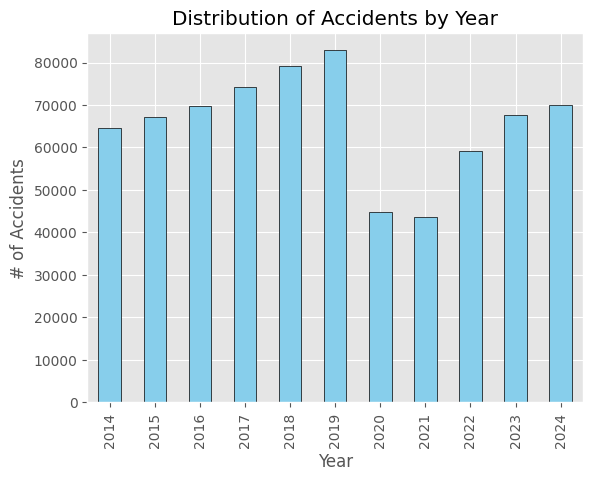

In [ ]:
plt.style.use('ggplot')

df['OCC_YEAR'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('# of Accidents')
plt.show()

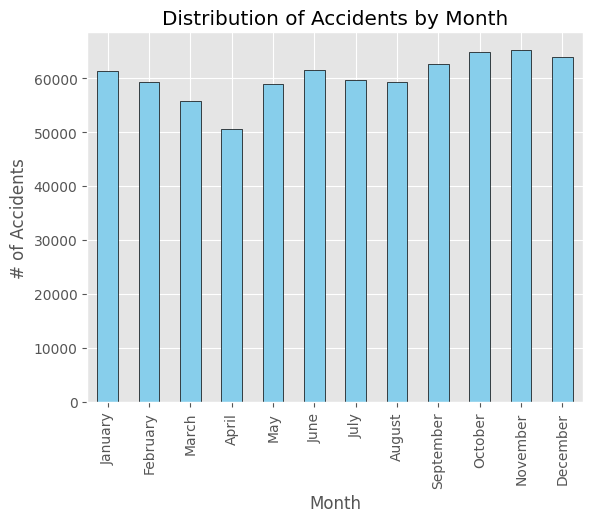

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
df['OCC_MONTH'].value_counts().reindex(months).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('# of Accidents')
plt.show()

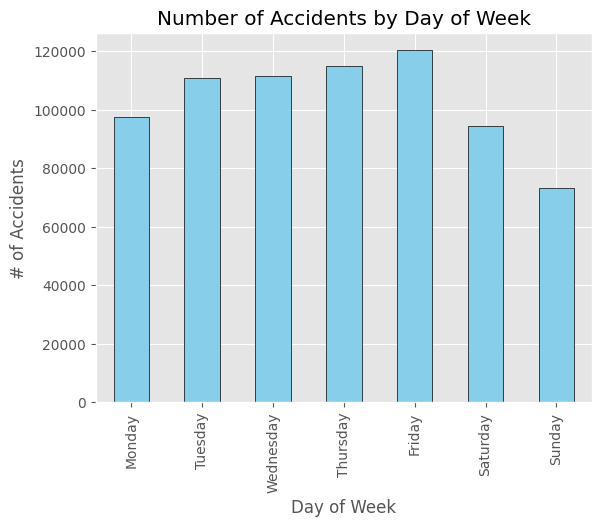

In [ ]:
df['OCC_DOW'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('# of Accidents')
plt.show()

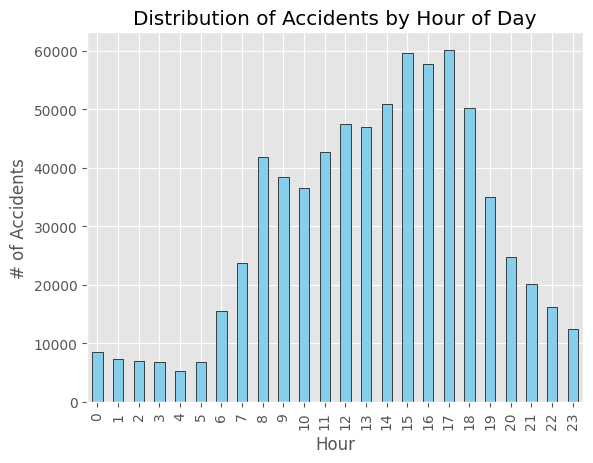

In [ ]:
df['OCC_HOUR'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('# of Accidents')
plt.show()

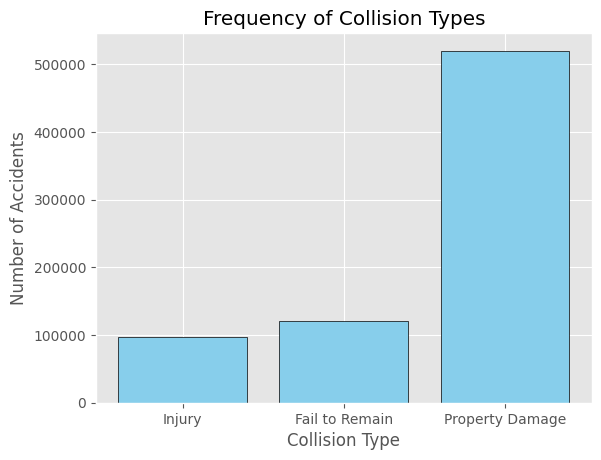

In [ ]:
plt.bar(['Injury', 'Fail to Remain', 'Property Damage'], df[['INJURY_COLLISIONS', 'FTR_COLLISIONS', 'PD_COLLISIONS']].sum().values, color='skyblue', edgecolor='black')
plt.title('Frequency of Collision Types')
plt.xlabel('Collision Type')
plt.ylabel('Number of Accidents')
plt.show()

The second part of this analysis will involve the development of bivariate/multivariate plots showing the following:<br>
> - Division vs Collision Types <br>
> - Hour vs Injury Rate <br>
> - Day of Week vs Injury Rate<br>
> - Vehicle Type vs Injury Rate<br>
> - Accidents by Hour vs Severity<br>
> - Scatter plot of accident location<br>

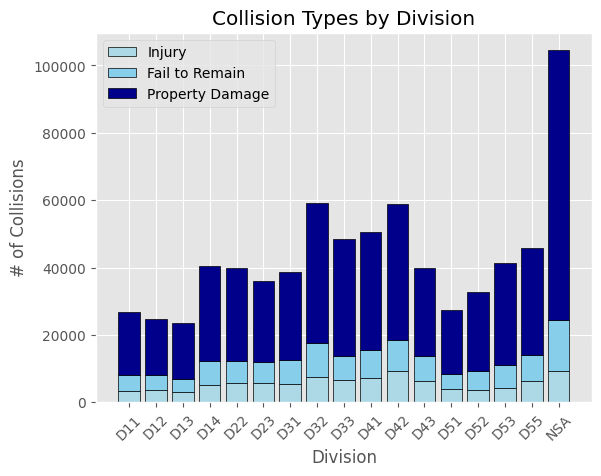

In [20]:
# Division vs Collision Types 
dvc = df.groupby('DIVISION')[['INJURY_COLLISIONS', 'FTR_COLLISIONS', 'PD_COLLISIONS']].sum()

plt.bar(dvc.index,
        dvc['INJURY_COLLISIONS'],
        label='Injury',
        color='lightblue',
        edgecolor='black')

plt.bar(dvc.index,
        dvc['FTR_COLLISIONS'],
        bottom=dvc['INJURY_COLLISIONS'],
        label='Fail to Remain',
        color='skyblue',
        edgecolor='black')

plt.bar(dvc.index,
        dvc['PD_COLLISIONS'],
        bottom=dvc['INJURY_COLLISIONS'] + dvc['FTR_COLLISIONS'],
        label='Property Damage',
        color='darkblue',
        edgecolor='black')

plt.title('Collision Types by Division')
plt.xlabel('Division')
plt.ylabel('# of Collisions')
plt.legend()
plt.xticks(rotation=45)
plt.show()

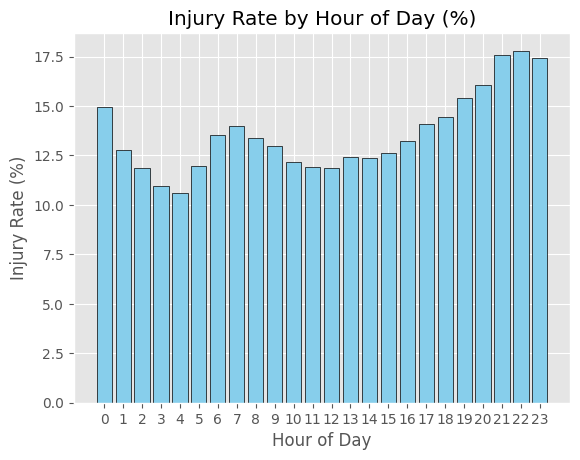

In [9]:
# Hour vs Injury Rate
hours = df.groupby('OCC_HOUR').agg(total=('INJURY_COLLISIONS', 'count'),injuries=('INJURY_COLLISIONS', 'sum'))
hours['injury_rate'] = hours['injuries'] / hours['total'] * 100

plt.bar(hours.index,
        hours['injury_rate'],
        color='skyblue',
        edgecolor='black')

plt.title('Injury Rate by Hour of Day (%)')
plt.xlabel('Hour of Day')
plt.ylabel('Injury Rate (%)')
plt.xticks(range(0, 24))
plt.show()

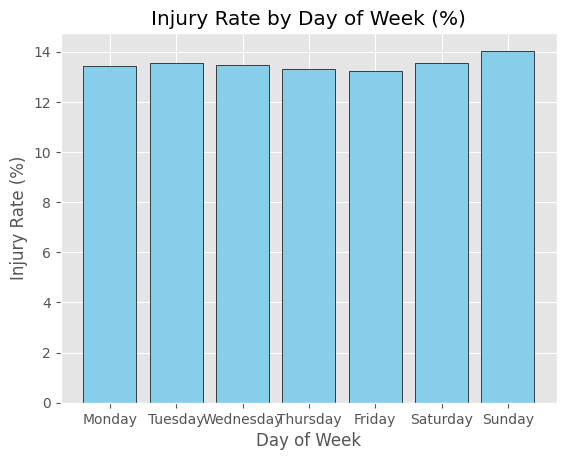

In [10]:
# Day of Week vs Injury Rate
dow = df.groupby('OCC_DOW').agg(total=('INJURY_COLLISIONS', 'count'),
                                     injuries=('INJURY_COLLISIONS', 'sum')).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
dow['injury_rate'] = dow['injuries'] / dow['total'] * 100

plt.bar(dow.index,
        dow['injury_rate'],
        color='skyblue',
        edgecolor='black')

plt.title('Injury Rate by Day of Week (%)')
plt.xlabel('Day of Week')
plt.ylabel('Injury Rate (%)')
plt.show()

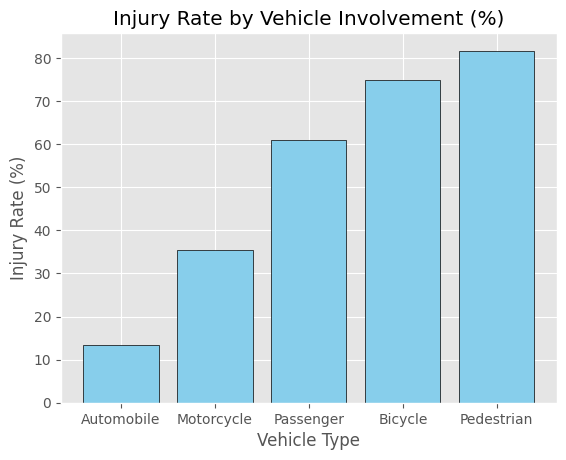

In [11]:
# Vehicle Type vs Injury Rate
rates = []
for col in ['AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER', 'BICYCLE', 'PEDESTRIAN']:
    total = df[df[col] == 1].shape[0]
    injuries = df[df[col] == 1]['INJURY_COLLISIONS'].sum()
    rate = (injuries / total * 100) if total > 0 else 0
    rates.append(rate)

plt.bar(['Automobile', 'Motorcycle', 'Passenger', 'Bicycle', 'Pedestrian'],
        rates,
        color='skyblue',
        edgecolor='black')

plt.title('Injury Rate by Vehicle Involvement (%)')
plt.xlabel('Vehicle Type')
plt.ylabel('Injury Rate (%)')
plt.show()

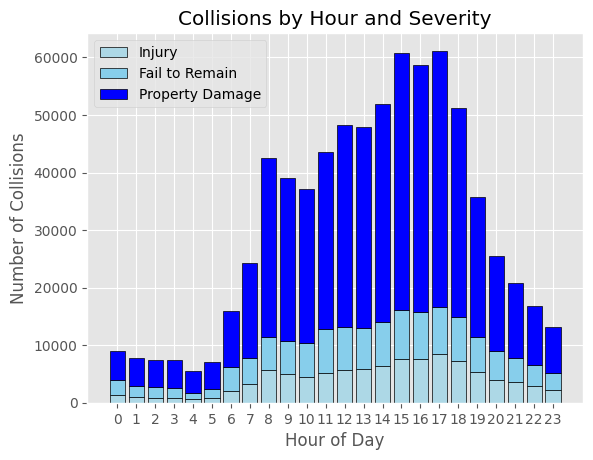

In [21]:
# Accidents by hour vs severity
severity = df.groupby('OCC_HOUR')[['INJURY_COLLISIONS', 'FTR_COLLISIONS', 'PD_COLLISIONS']].sum()

plt.bar(severity.index,
        severity['INJURY_COLLISIONS'],
        label='Injury',
        color='lightblue',
        edgecolor='black')

plt.bar(severity.index,
        severity['FTR_COLLISIONS'],
        bottom=severity['INJURY_COLLISIONS'],
        label='Fail to Remain',
        color='skyblue',
        edgecolor='black')

plt.bar(severity.index,
        severity['PD_COLLISIONS'],
        bottom=severity['INJURY_COLLISIONS'] + severity['FTR_COLLISIONS'],
        label='Property Damage',
        color='blue',
        edgecolor='black')

plt.title('Collisions by Hour and Severity')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Collisions')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

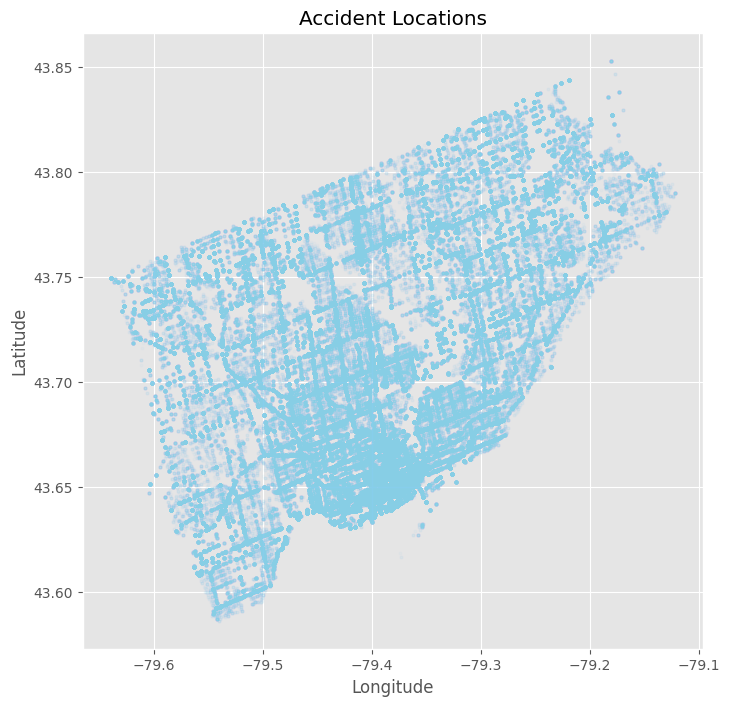

In [13]:
# Scatter plot of accident location
locs = df[(df['LONG_WGS84'] != 0) & (df['LAT_WGS84'] != 0)]

plt.figure(figsize=(8, 8))
plt.scatter(locs['LONG_WGS84'],
            locs['LAT_WGS84'],
            alpha=0.05, s=5,
            color='skyblue')

plt.title('Accident Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Part 3: Hypothesis Testing

We will first perform a Chi-square test to see if some divisions have significantly different injury rates.

In [14]:
contingency = pd.crosstab(df['DIVISION'],df['INJURY_COLLISIONS'])
stat, pval, dof, expected = chi2_contingency(contingency)
print("p-value =", pval)
print("We reject the null hypothesis which was that the injury collision rate is independent of police division")

p-value = 0.0
We reject the null hypothesis which was that the injury collision rate is independent of police division


Now let's perform a t-test to see if the average number of vehicle types involved are different between day and night.

In [ ]:
def light_condition(hour): return 'Night' if hour <= 5 or hour >= 20 else 'Day'
df['LIGHT_CONDITION'] = df['OCC_HOUR'].apply(light_condition)

df['VEHICLE_COUNT'] = df[['AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER', 'BICYCLE', 'PEDESTRIAN']].sum(axis=1)
day = df[df['LIGHT_CONDITION'] == 'Day']['VEHICLE_COUNT']
night = df[df['LIGHT_CONDITION'] == 'Night']['VEHICLE_COUNT']
stat, pval = ttest_ind(day, night, equal_var=False)

print("p-value = ", pval)
print("We reject the null hypothesis which was that the average number of vehicle types are the same during the day and night.")

p-value =  1.788393331411984e-288
We reject the null hypothesis which was that the average number of vehicle types are the same during the day and night.
